In [81]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


#Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, accuracy_score, roc_curve, roc_auc_score
import pandas as pd
import os

# pip install psycopg2-binary
from psycopg2 import sql, connect
from matplotlib import pyplot
import matplotlib.pylab as plt
#get_ipython().run_line_magic('matplotlib', 'inline')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [83]:
try:
    # declare a new PostgreSQL connection object
    conn = connect(
        dbname = "spotifydata",
        user = "postgres",
        host = "spotifyaws.cxmgxnqnrkea.us-east-2.rds.amazonaws.com",
        port = "5432",
        password = "$potify!"
    )

    # print the connection if successful
    print ("psycopg2 connection:", conn)

except Exception as err:
    print ("psycopg2 connect() ERROR:", err)
    conn = None

psycopg2 connection: <connection object at 0x000001B450195A68; dsn: 'user=postgres password=xxx dbname=spotifydata host=spotifyaws.cxmgxnqnrkea.us-east-2.rds.amazonaws.com port=5432', closed: 0>


In [84]:
cu = conn.cursor()
cu.execute('SELECT * FROM join_test;')
fet = cu.fetchall()

# Extract the column names
col_names = []
for elt in cu.description:
    col_names.append(elt[0])

# Create the dataframe, passing in the list of col_names extracted from the description
df = pd.DataFrame(fet, columns=col_names)

df.head()

,track,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,Give It To Her,0.6,0.583,9.0,-6.617,0,0.281,0.0918,0,0.0992,0.763,126.517,209053,5,39.96991,11
1,Falling,0.192,0.138,5.0,-17.135,1,0.0315,0.892,0.553,0.114,0.0757,142.187,321853,4,60.94077,17
2,Say It (Over And Over Again),0.488,0.124,3.0,-13.038,1,0.0404,0.963,0.333,0.246,0.205,66.105,255960,4,59.36904,10
3,I Live For Your Love,0.327,0.361,6.0,-9.431,1,0.0319,0.864,0.117,0.13,0.168,84.525,267067,4,59.30493,8
4,To All The Girls I Fuck Before,0.516,0.416,2.0,-10.222,1,0.113,0.66,0,0.157,0.946,71.642,187787,4,45.64159,7


In [58]:
spotifydf.decade.value_counts()

60s    8642
70s    7764
80s    6907
10s    6396
00s    5871
90s    5519
Name: decade, dtype: int64

In [59]:
enc = OneHotEncoder(sparse=False)
enc_df = pd.DataFrame(enc.fit_transform(spotifydf[["decade"]]))
enc_df.columns= enc.get_feature_names(["decade"])
enc_df

,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
41094,0.0,1.0,0.0,0.0,0.0,0.0
41095,0.0,1.0,0.0,0.0,0.0,0.0
41096,0.0,1.0,0.0,0.0,0.0,0.0
41097,0.0,1.0,0.0,0.0,0.0,0.0


In [60]:
preprocess_df = spotifydf.merge(enc_df, left_index=True, right_index=True)


In [61]:
preprocess_df.drop(columns=["uri","artist","track","decade"], inplace=True)
preprocess_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,chorus_hit,sections,popularity,decade_00s,decade_10s,decade_60s,decade_70s,decade_80s,decade_90s
0,0.417,0.620,3,-7.727,1,0.0403,0.4900,0.000000,0.0779,0.8450,...,3,32.94975,9,1,0.0,0.0,1.0,0.0,0.0,0.0
1,0.498,0.505,3,-12.475,1,0.0337,0.0180,0.107000,0.1760,0.7970,...,4,48.82510,10,0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.657,0.649,5,-13.392,1,0.0380,0.8460,0.000004,0.1190,0.9080,...,4,37.22663,12,0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.590,0.545,7,-12.058,0,0.1040,0.7060,0.024600,0.0610,0.9670,...,4,24.75484,8,0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.515,0.765,11,-3.515,0,0.1240,0.8570,0.000872,0.2130,0.9060,...,4,21.79874,14,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41094,0.172,0.358,9,-14.430,1,0.0342,0.8860,0.966000,0.3140,0.0361,...,4,24.30824,7,0,0.0,1.0,0.0,0.0,0.0,0.0
41095,0.910,0.366,1,-9.954,1,0.0941,0.0996,0.000000,0.2610,0.7400,...,4,32.53856,8,1,0.0,1.0,0.0,0.0,0.0,0.0
41096,0.719,0.804,10,-4.581,1,0.0355,0.0132,0.000003,0.1390,0.6050,...,4,20.73371,7,1,0.0,1.0,0.0,0.0,0.0,0.0
41097,0.600,0.177,7,-16.070,1,0.0561,0.9890,0.868000,0.1490,0.5600,...,4,21.65301,14,0,0.0,1.0,0.0,0.0,0.0,0.0


In [62]:
preprocess_df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
popularity            int64
decade_00s          float64
decade_10s          float64
decade_60s          float64
decade_70s          float64
decade_80s          float64
decade_90s          float64
dtype: object

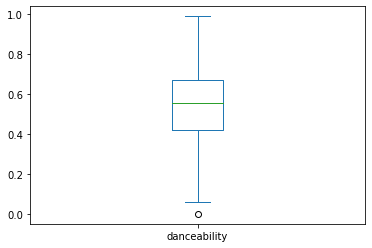

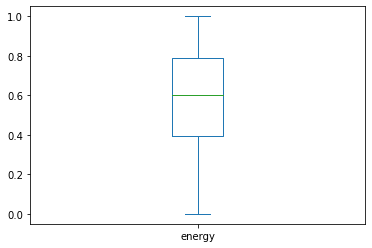

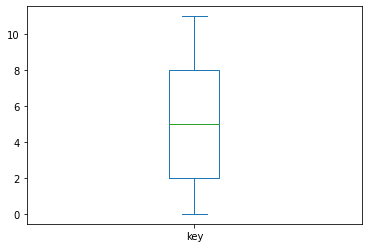

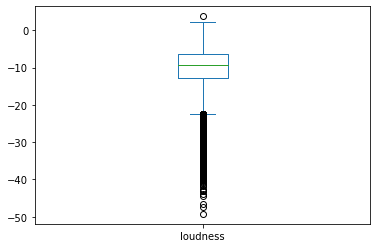

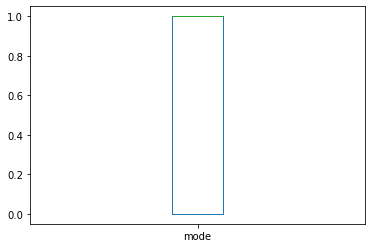

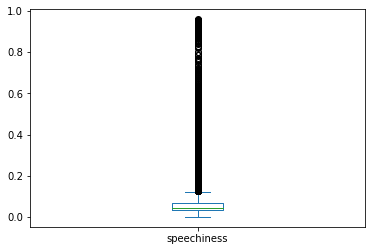

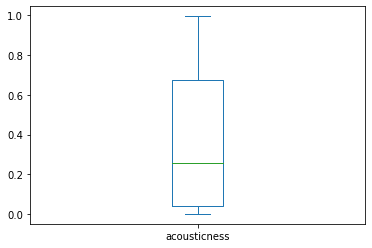

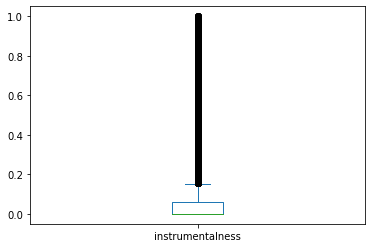

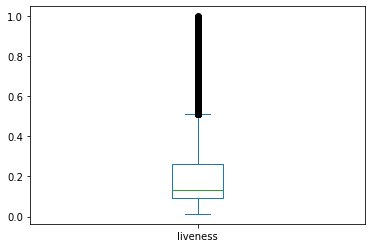

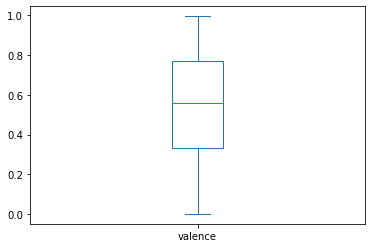

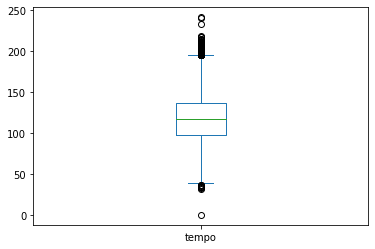

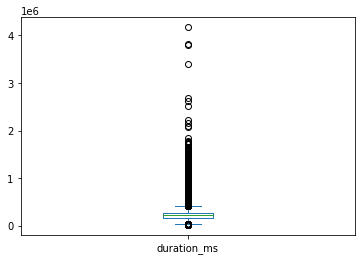

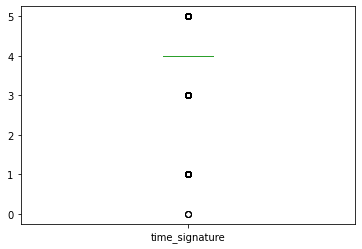

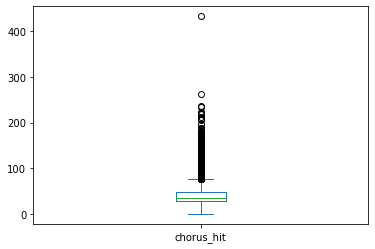

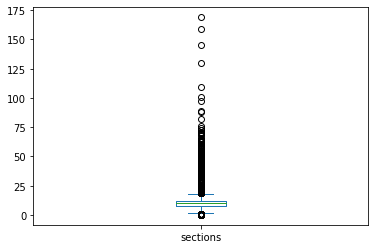

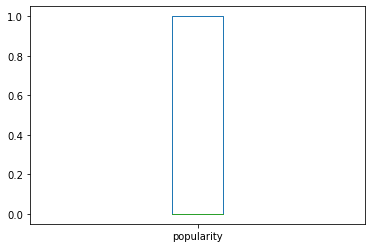

In [65]:
for col in preprocess_df.columns[:-6]:
    preprocess_df[col].plot.box()
    plt.show()

In [66]:
X = preprocess_df.drop(columns="popularity")
y = preprocess_df.popularity

In [69]:
X_scaled = StandardScaler().fit_transform(X)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=50)

In [73]:
num_input_features = len(X_train[0])
hidden_nodes_layer_1 = 10
hidden_nodes_layer_2 = 6

nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(input_dim=num_input_features, units=hidden_nodes_layer_1, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                220       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________


In [74]:
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [75]:
nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
964/964 [==============================] - 3s 2ms/step - loss: 0.5447 - accuracy: 0.7201
Epoch 2/100
964/964 [==============================] - 2s 2ms/step - loss: 0.4762 - accuracy: 0.7741
Epoch 3/100
964/964 [==============================] - 2s 2ms/step - loss: 0.4629 - accuracy: 0.7813
Epoch 4/100
964/964 [==============================] - 2s 2ms/step - loss: 0.4551 - accuracy: 0.7862
Epoch 5/100
964/964 [==============================] - 2s 2ms/step - loss: 0.4497 - accuracy: 0.7887
Epoch 6/100
964/964 [==============================] - 2s 2ms/step - loss: 0.4460 - accuracy: 0.7912
Epoch 7/100
964/964 [==============================] - 2s 2ms/step - loss: 0.4430 - accuracy: 0.7925
Epoch 8/100
964/964 [==============================] - 2s 2ms/step - loss: 0.4405 - accuracy: 0.7931
Epoch 9/100
964/964 [==============================] - 3s 3ms/step - loss: 0.4385 - accuracy: 0.7951
Epoch 10/100
964/964 [==============================] - 2s 2ms/step - loss: 0.4370 - accura

In [77]:
model_loss, model_accuracy=nn_model.evaluate(X_test, y_test, verbose=2)
print(model_loss, model_accuracy)

322/322 - 1s - loss: 0.4320 - accuracy: 0.7977 - 895ms/epoch - 3ms/step
0.43196913599967957 0.797664225101471


In [78]:
nn_model.save("NeuralNetwork.h5")